# Introductory applied machine learning
# Assignment 1

## Important Instructions
#### <span style="color:blue">SUBMISSION INSTRUCTIONS WILL BE REALEASED SHORTLY</span>

**It is important that you carefully follow the instructions below for things to work properly.**

1. You need to have your environment set up as in the [README](https://github.com/amosstorkey/iaml-labs) and you need to activate this environment before running this notebook:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer.

### SUBMISSION Mechanics

This assignment is formative and such will not count towards your final grade. Nonetheless, we ask you to submit answers to certain questions so that you can become familiar with the Gradescope system and so that we can summarize common mistakes people might make.

We will be using [Gradescope](https://www.gradescope.com/) for submissions. Submission instructions will be released separately shortly. You will be using a separate Latex-based file where you would copy your answers and/or code.

**IMPORTANT: Only specific questions need to be submitted. These are Question 2.2, Question 2.4, Question 4.3 and Question 4.4,**

The submission deadline for this assignment by **Monday 14/10/2019 at 16:00**. 

Since this assignment is formative, there will be no marking assigned.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

C:\Users\User\Miniconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


# Question 1
## 20 Newsgroup Dataset 

### Description of the dataset

This question is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [2]:
# (1) # Your Code goes here:

news_path = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw = pd.read_csv(news_path)
news_raw.info()
news_raw

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1
7,1,1,1,1,1,1,1,1,1,1,...,2,8,6,2,3,7,8,2,5,3
8,1,1,1,1,1,1,1,1,1,1,...,5,3,7,8,1,2,3,2,6,5
9,1,1,1,1,1,1,1,1,1,1,...,3,7,2,4,1,2,5,7,1,1


(2) ***Your answer goes here:***

There are a total of 2129 different documents used and this dataset includes 520 words in these documents with the highest mutual information. The last column indicates the class of the document and the values in cell represent the frequency of the word in each document plus 1.

### ========== Question 1.2 ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [4]:
# (1) # Your Code goes here:
news_raw.head()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3


(2) ***Your answer goes here:***

This dataset includes 520 words in these documents with the highest mutual information. The last column indicates the class of the document and the values in cell represent the frequency of the word in each document plus 1.

# Question 2
## Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.21/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [5]:
# Your Code goes here:
train_path = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
news_train = pd.read_csv(train_path)
test_path = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')
news_test = pd.read_csv(test_path)

#summarizing cleaned data sets
news_train.describe()
news_test.describe()


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.007812,1.031250,1.0,1.0,1.007812,1.015625,1.007812,1.039062,1.015625,1.085938,...,4.757812,4.351562,4.593750,4.445312,4.53125,4.453125,4.687500,4.421875,4.531250,3.078125
std,0.088388,0.278847,0.0,0.0,0.088388,0.124507,0.088388,0.291678,0.124507,0.281373,...,2.201453,2.175706,2.438011,2.387001,2.31373,2.383868,2.390104,2.285212,2.370878,1.400840
min,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,2.75000,2.000000,2.750000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,3.000000
75%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,6.25000,7.000000,7.000000,6.000000,7.000000,4.000000
max,2.000000,4.000000,1.0,1.0,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,5.000000


### ========== Question 2.2 ==========
#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

(1/2) ***Your answer goes here:***

1. The assumption behind the Naive Bayes Model is that there is independence between all the attributes used to predict the outcome. In this particular dataset/situation, we are assuming that the occurence of any one of the words is independent of the occurence of any of the other words in the dataset which is going to be used to classify a particular document.

2. The main practical problem if we didn't make the Naive Bayes assumption (conditional independence given the label) is that we would have to estimate a full covariance matrix of size 521 X 521 (i.e. ~270,000 parameters) and we only have 60,000 samples, so the covariance estimate might be dominated by noise. Assuming conditional independence allows us to esimate a diagonal covariance matrix i.e. estimate a variance for each variable independently and assume all covariances between distinct variables are 0.

### ========== Question 2.3 ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset `news_train`. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

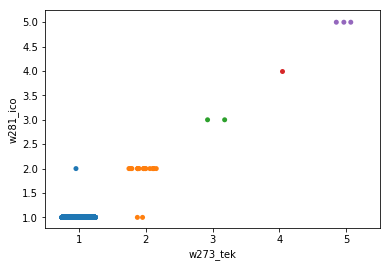

In [6]:
# (1) # Your Code goes here:

#ico = news_train['w281_ico'].values
#tek = news_train['w273_tek'].values
#plt.scatter(ico, tek, color='k', jitter=0.05)
#plt.xlabel('Tek', color = 'g')
#plt.ylabel('Ico', color = 'r')
#plt.show()

ax = sns.stripplot(x="w273_tek", y="w281_ico", jitter=0.25, data=news_train)


(2) ***Your answer goes here:***

These 2 features seem to be linearly directly proportional at first glance. This means that an increase in the frequency of one attribute would also mean that the frequency of the other attribute also increases. This potential impacts the validity of the Naive Bayes assumption as the 2 attributes do not seem completely independent of each other. However, more data is needed to make the assumption invalid as the attributes chosen already had high mutual information which could potentially explain the relation. Also, the frequency in which they both occur at higher frequency is low.

### ========== Question 2.4 ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

(1) ***Your answer goes here:***

As the baseline, I would classify everything as Class 3 as the mean of all the classes is rougly 3.

In [7]:
# (2) # Your Code goes here:

X_train = news_train.drop('class', axis=1)
y_train = news_train['class']
baseline = np.full((2099,), 3)

#classification accuracy
ca = metrics.accuracy_score(y_train, baseline)
print("Accuracy:", ca)

Accuracy: 0.20104811815150073


<a id='question_2_5'></a>
### ========== Question 2.5 ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [8]:
# (1) # Your Code goes here:

X_train = news_train.drop('class', axis=1)
y_train = news_train['class']

#Initializing a Gaussian Naive Bayes Model
gnb = GaussianNB()
gnb.fit(X=X_train, y=y_train)

GaussianNB(priors=None)

Accuracy: 0.8780371605526441


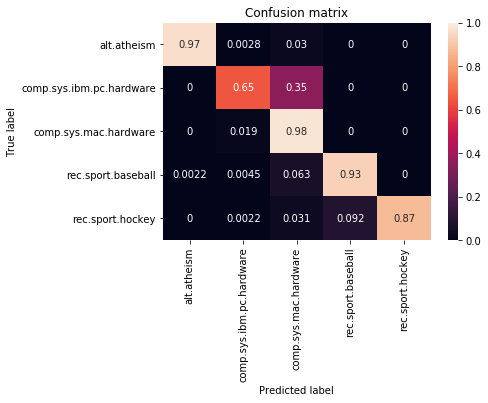

In [9]:
# (2) # Your Code goes here:

y_pred = gnb.predict(X=X_train)

#classification accuracy
ca = metrics.accuracy_score(y_train, y_pred)
print("Accuracy:", ca)

#confusion matrix
cm = confusion_matrix(y_train, y_pred)
cm

#normalizing the cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
cm_norm
## Confusion matrix has values c_ij such that true label i is predicted as label j, i.e. rows should sum to 1


def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure()
plot_confusion_matrix(cm_norm, classes=['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
                                        'rec.sport.baseball', 'rec.sport.hockey'])

(3) ***Your answer goes here:***

The model has performed quite well. The classification accuracy value is 0.820 (3sf) and the true positives of Class 1,3,4,5 are all above this value and only the true positives of class 2 has failed to meet this requirement.

### ========== Question 2.6 ==========
#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

***Your answer goes here:***

The confusion matrix looks more or less like what I would have expected except for its performance of class 2. The true positive rate of class 1,3,4,5 are all relatively quite high and also above the classification accuracy. With regards to class 2, the true positive rate lies only at 0.65 with the rest falsely predicted as Class 3. This could potentially be attributed to the fact that classes 2 and 3 are similar in nature.

### ========== Question 2.7 ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with (a) the training data and (b) the baseline (on the test data).

Accuracy: 0.8203125


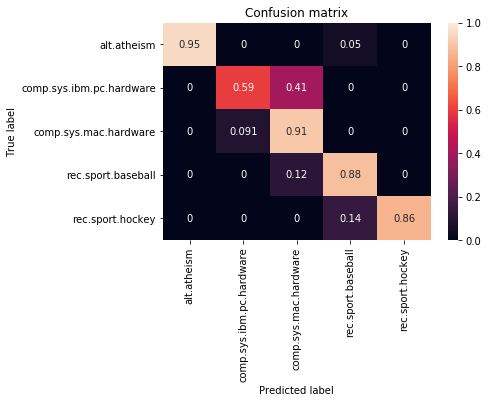

In [10]:
# (1) # Your Code goes here:

#setting up test dataset
X_test = news_test.drop('class', axis=1)
y_test = news_test['class']
y_pred = gnb.predict(X=X_test)

#classification accuracy
ca = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", ca)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

#normalizing the cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
cm_norm
## Confusion matrix has values c_ij such that true label i is predicted as label j, i.e. rows should sum to 1


def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure()
plot_confusion_matrix(cm_norm, classes=['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
                                        'rec.sport.baseball', 'rec.sport.hockey'])


In [11]:
# (2) # Your Code goes here:

#classification accuracy
baseline = np.full((128,), 3)
ca = metrics.accuracy_score(y_test, baseline)
print("Accuracy:", ca)

Accuracy: 0.171875


(3) ***Your answer goes here:***

The classification accuracy on the training data is higher than that of the accuracy of the test data. The true positive rate acorss all the classes is also higher in the training data as compared to the test data. The baseline accuracy of the training data is also higher than the baseline accuracy of the test data.

### ========== Question 2.8 ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

In [12]:
# (1) # Your Code goes here:

X_raw = news_raw.drop('class', axis=1)
y_raw = news_raw['class']

#Initializing a Gaussian Naive Bayes Model
gnb = GaussianNB()
gnb.fit(X=X_raw, y=y_raw)

y_pred = gnb.predict(X=X_test)

#classification accuracy
ca = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", ca)

Accuracy: 0.171875


(2) ***Your answer goes here:***

The accuracy is very low as compared to the datasets that have data that is cleaned up. This is because the presence of outliers will distort the values and thus make classification more difficult and inaccurate.

### ========== Question 2.9 ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***

Gaussian Naive Bayes assumes that it follows a normal distribution. I would use a Multinominial Naive Bayes classifier. It is used for discrete counts and we are looking at the number of times an outcome is observed over the n trials.

<a id='question_3'></a>
# Question 3
## Automobile Pricing Dataset

### Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_3_1'></a>
### ========== Question 3.1 ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [67]:
# (1) # Your Code goes here:

auto_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(auto_path)

auto_numeric.info()
auto_numeric.describe()
auto_numeric


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
normalized-losses          159 non-null float64
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-size                159 non-null float64
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null float64
engine-power               159 non-null float64
peak-rpm                   159 non-null float64
city-mpg                   159 non-null float64
highway-mpg                159 non-null float64
mean-effective-pressure    159 non-null float64
torque                     159 non-null float64
price                      159 non-null float64
dtypes: float64(16)
memory usage: 20.0 KB


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0
8,121.0,88.4,141.1,60.3,53.2,3.39,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,59.33,25.08,5151.0
9,98.0,104.3,155.9,68.3,52.0,6.05,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,51.55,36.35,6295.0


(2) ***Your answer goes here:***

There are 159 different cars altogether in this dataset and this dataset includes 16 attributes from each of the cars. In most cases, the mean of the attribute is close to and similar to the median of the attribute.

### ========== Question 3.2 ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
price,0.015368,0.423511,0.512883,0.524326,0.139563,0.715125,0.365207,0.127834,0.125683,0.443969,-0.099345,-0.35679,-0.438467,-0.10486,0.101435,1.0


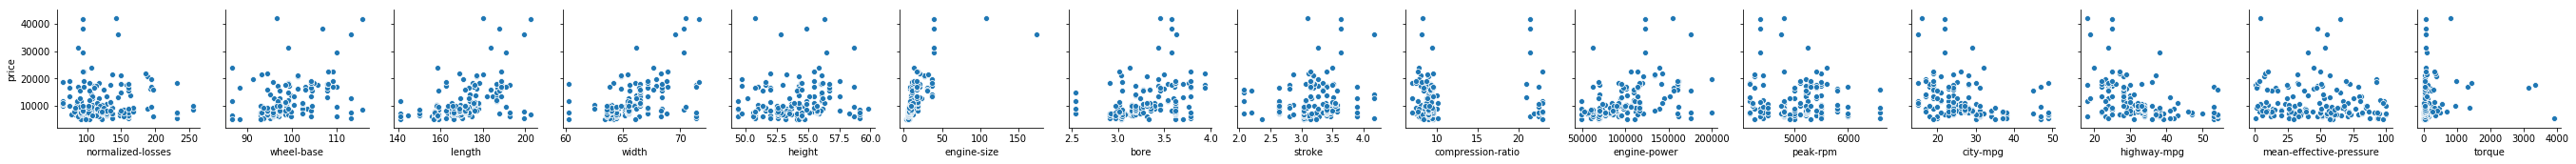

In [17]:
# (1) # Your Code goes here:

# To find the correlation among 
# the columns using pearson method 
correlation_matrix = auto_numeric.corr(method ='pearson') 

#pairwise distribution
sns.pairplot(auto_numeric, x_vars=["normalized-losses", "wheel-base", "length", "width", "height", "engine-size", 
                                   "bore", "stroke", "compression-ratio", "engine-power", "peak-rpm", "city-mpg",
                                   "highway-mpg", "mean-effective-pressure", "torque"], y_vars=["price"])

#correlation matrix interested
correlation_matrix.tail(1)

(2) ***Your answer goes here:***


I think "wheel-base", "length", "width", "city-mpg", "highway-mpg" are most useful in predicting the price as when seen visually, these values seem to have a clearer correlation with regards to the price. I think that the visualization is better than using the correlation coefficient as some outliers may affect the correlation coefficient whereas when we see visually we can account for it and notice the general trend instead.

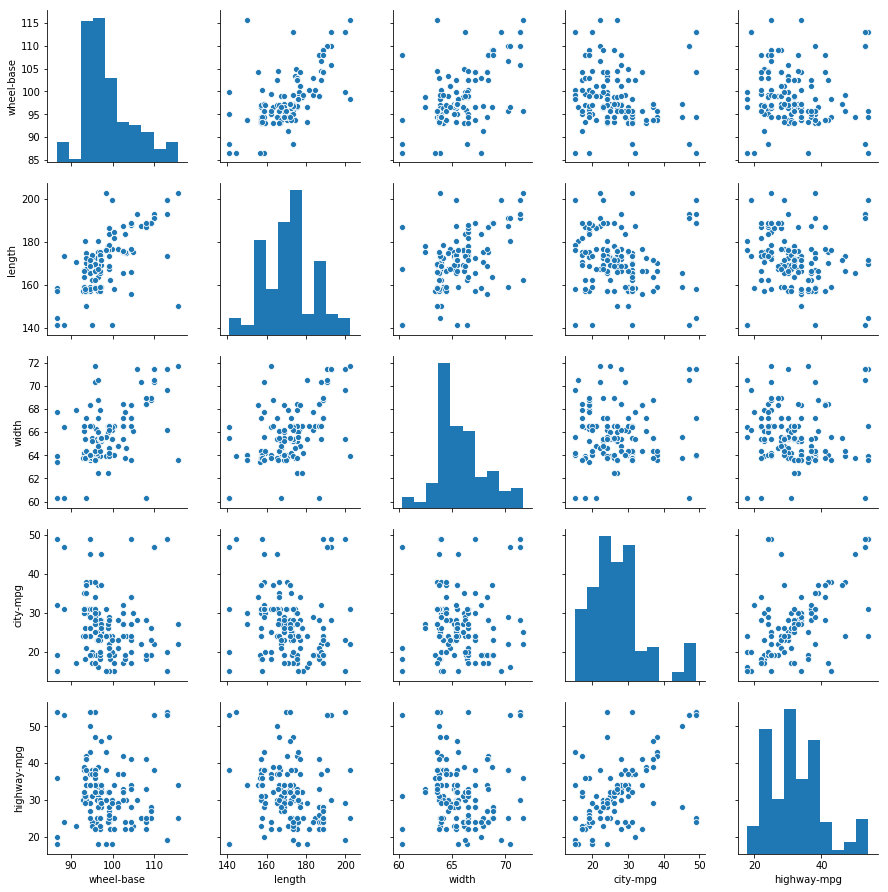

In [102]:
# (3) # Your Code goes here:
 
#pairwise distribution
sns.pairplot(auto_numeric, x_vars=["wheel-base", "length", "width", "city-mpg",
                                   "highway-mpg"], y_vars=["wheel-base", "length", "width", "city-mpg",
                                   "highway-mpg"])

(4) ***Your answer goes here:***

The following pairs of attributes display significant correlation between one another
1. wheel-base and length
2. wheel-base and width
3. length and width
4. city-mpg and highway-mpg

(5) ***Your answer goes here:***

I would remove attributes that display significant correlation with each other as the presence of one of the attributes lessens the need of the other attribute. Looking at the following pairs 

1. wheel-base and length
2. wheel-base and width
3. length and width
4. city-mpg and highway-mpg

I would remove one of wheel-base, length, width and one of city-mpg or highway-mpg

# Question 4
## Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.21/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. In this question we will perform K-fold cross-validation using scikit's *KFold* class.**

<a id='question_4_1'></a>
### ========== Question 4.1  ==========

K-fold cross-validation.

1. [Text] What other technique for validation could we use (rather than K-Fold cross-validation)?

1. [Text] Given the analysis you did on the automobile dataset in [Question 3](#question_3), what problem are we trying to solve by using K-Fold cross-validation?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*


(1) ***Your answer goes here:***

Other techniques include hold out validation and leave-out-one cross-validation.

(2) ***Your answer goes here:***

We could use K-Fold cross-validation to give an indication of how well the model will generalize to an unseen data set.

In [32]:
# (3) # Your Code goes here:

#setting independent and dependent variables
X = auto_numeric.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
y = auto_numeric.iloc[:, 15] 

kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits()

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


TRAIN: [  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43
  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136
 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157
 158] TEST: [  7   8  19  24  26  33  37  40  44  45  54  56  59  60  61  62  63  83
  85  86  90  95 110 119 120 126 128 131 134 142 144 148]


KeyError: '[  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20\n  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43\n  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70\n  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92\n  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112\n 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136\n 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157\n 158] not in index'

### ========== Question 4.1  ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 3.1](#question_3_1), and evaluate it using the *KFold* instance you created in [Question 4.1](#question_4_1) (report RMSE and $R^2$). 

In [41]:
# (1) # Your Code goes here:

#setting independent and dependent variables
X = auto_numeric.iloc[:, [0, 14]]
y = auto_numeric.iloc[:, 15] 

# Model initialization
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(X, y)

# Predict
y_predicted = regression_model.predict(X)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

rmse, r2

(44734833.47709128, 0.010459737152154314)

### ========== Question 4.2 ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

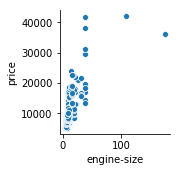

In [38]:
# (1) # Your Code goes here:

sns.pairplot(auto_numeric, x_vars=["engine-size"], y_vars= ["price"])

(2) ***Your answer goes here:***

There seems to be a presence of potential outliers in the data which linear regression is sensitive to.

<a id='question_4_3'></a>
### ========== Question 4.3 ==========
#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

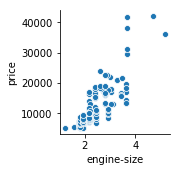

In [73]:
# (1) # Your Code goes here:

#taking the logarithm of each value
auto_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_num = pd.read_csv(auto_path)

new_auto = auto_num["engine-size"].transform(np.log)
auto_num["engine-size"] = new_auto
sns.pairplot(auto_numeric, x_vars=["engine-size"], y_vars= ["price"])



In [74]:
# (2) # Your Code goes here:

#setting independent and dependent variables
X = auto_num.iloc[:, [0, 14]]
y = auto_num.iloc[:, 15] 

# Model initialization
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(X, y)

# Predict
y_predicted = regression_model.predict(X)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

rmse, r2

(44734833.47709128, 0.010459737152154314)

(3) ***Your answer goes here:***

Performance of model has not changed. 

### ========== Question 4.4 ==========

#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 4.3](#question_4_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. Even after we select features with the highest coeffiecients, we need to check if these variables are correlated with each other and then to make the model better we then need to keep only one of them and drop the rest.

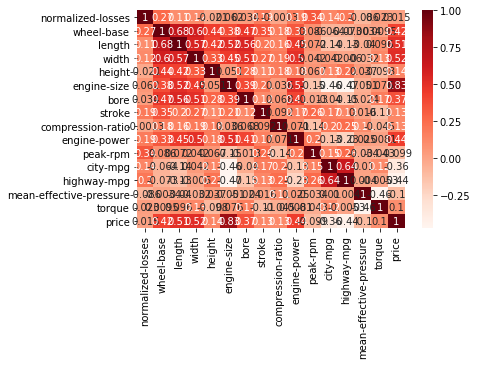

In [78]:
# (2) # Your Code goes here:

#Using Pearson Correlation
cor = auto_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

#wheel-base, length, width, engine-size, engine-power have highest correlation coeffiecient. but we need to double check
#correlation of these variables with each other.

#engine-size = 0.83
#width = 0.52
#length = 0.51
#engine-power = 0.44
#wheel-base = 0.42

(3) ***Your answer goes here:***

engize-size, width and length

### ========== Question 4.5 ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 4.3](#question_4_3).

(1) ***Your answer goes here:***

In [ ]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***